### **Download QQQ Data from 2019-01-01 to 2024-01-09**

In [5]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
!echo $HOME


/home/u762545


In [4]:
import os
import yfinance as yf
import pandas as pd

# Make sure this path is inside your home directory
output_dir = os.path.expanduser("~/Thesis/Data")
os.makedirs(output_dir, exist_ok=True)

# Download Nasdaq data
start_date = "2019-01-01"
end_date = "2024-01-09"
nasdaq_df = yf.download("QQQ", start=start_date, end=end_date, interval="1d")
nasdaq_df.reset_index(inplace=True)

# Save file to that directory
output_path = os.path.join(output_dir, "nasdaq100_real.csv")
nasdaq_df.to_csv(output_path, index=False)

print("✅ Saved Nasdaq 100 data to:", output_path)


[*********************100%***********************]  1 of 1 completed

✅ Saved Nasdaq 100 data to: /home/u762545/Thesis/Data/nasdaq100_real.csv


✅ Nasdaq 100 dataset loaded and trimmed.
📅 Date range: 2019-01-02 to 2023-12-15
🧾 Shape: (1249, 6)

📊 Descriptive stats:
                                Date        Close         High          Low  \
count                           1249  1249.000000  1249.000000  1249.000000   
mean   2021-06-24 06:12:23.634907648   281.728438   283.950748   279.154596   
min              2019-01-02 00:00:00   143.897461   147.201462   143.580504   
25%              2020-03-30 00:00:00   212.857971   214.507737   211.388568   
50%              2021-06-24 00:00:00   291.562836   294.288755   288.149647   
75%              2022-09-20 00:00:00   342.096893   345.449099   338.644563   
max              2023-12-15 00:00:00   401.332306   402.520453   399.579817   
std                              NaN    69.726846    70.170302    69.228408   

              Open        Volume  
count  1249.000000  1.249000e+03  
mean    281.609291  4.827162e+07  
min     145.021237  7.089000e+06  
25%     212.916204  3.13903

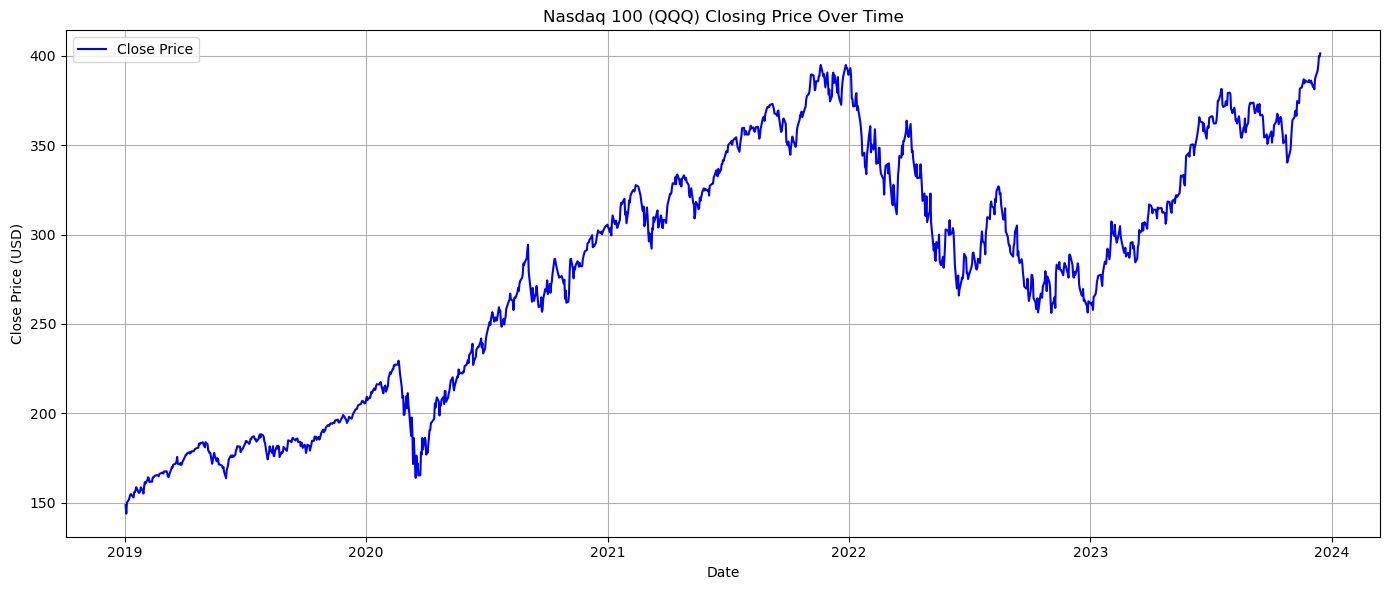

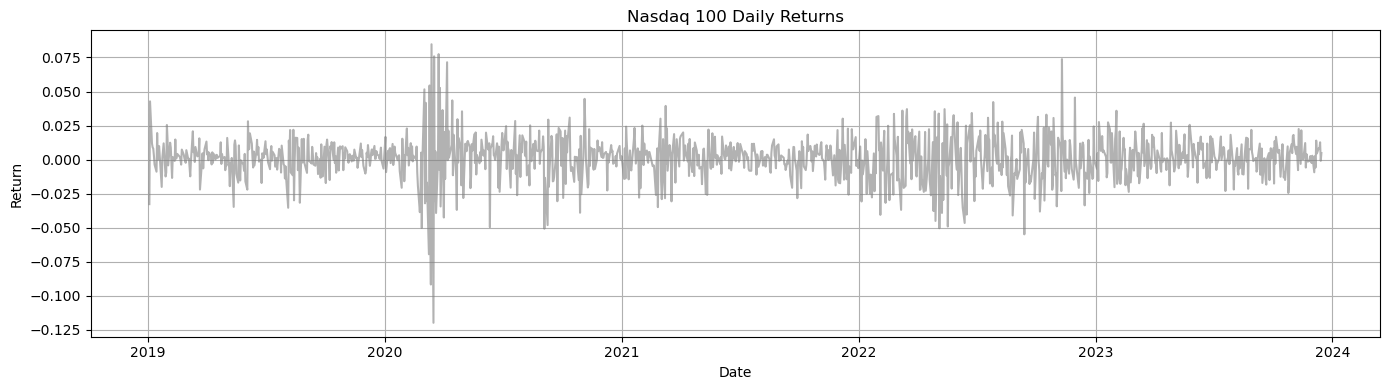

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === Load Nasdaq 100 data ===
nasdaq_path = "/home/u762545/Thesis/Data/nasdaq100_real.csv"
nasdaq_df = pd.read_csv(nasdaq_path, parse_dates=["Date"])

# === Convert financial columns to numeric in case of string types ===
numeric_cols = ["Open", "High", "Low", "Close", "Volume"]
nasdaq_df[numeric_cols] = nasdaq_df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# === Trim Nasdaq data to match sentiment period ===
cutoff_date = pd.to_datetime("2023-12-16")
nasdaq_df = nasdaq_df[nasdaq_df["Date"] < cutoff_date]

# === Basic EDA ===
print("✅ Nasdaq 100 dataset loaded and trimmed.")
print(f"📅 Date range: {nasdaq_df['Date'].min().date()} to {nasdaq_df['Date'].max().date()}")
print(f"🧾 Shape: {nasdaq_df.shape}")
print("\n📊 Descriptive stats:")
print(nasdaq_df.describe(datetime_is_numeric=True))

# === Plot 1: Closing price over time ===
plt.figure(figsize=(14, 6))
plt.plot(nasdaq_df["Date"], nasdaq_df["Close"], label="Close Price", color="blue")
plt.title("Nasdaq 100 (QQQ) Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("/home/u762545/Thesis/Plots/nasdaq_close_price_trimmed.png")
print("✅ Plot saved: nasdaq_close_price_trimmed.png")

# === Plot 2: Daily Returns ===
nasdaq_df["Daily Return"] = nasdaq_df["Close"].pct_change()

plt.figure(figsize=(14, 4))
plt.plot(nasdaq_df["Date"], nasdaq_df["Daily Return"], color="gray", alpha=0.6)
plt.title("Nasdaq 100 Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.tight_layout()
plt.savefig("/home/u762545/Thesis/Plots/nasdaq_daily_returns_trimmed.png")
print("✅ Plot saved: nasdaq_daily_returns_trimmed.png")

# === Save trimmed data ===
nasdaq_trimmed_path = "/home/u762545/Thesis/Data/nasdaq100_trimmed.csv"
nasdaq_df.to_csv(nasdaq_trimmed_path, index=False)
print(f"✅ Trimmed Nasdaq data saved to: {nasdaq_trimmed_path}")
